## WALKING RUNNING CLASSIFICATION PROJECT

**create model for classify whether person running or walking**


#### Introduction
In the age of wearable technology, motion sensors have become integral to tracking and analyzing human activity. These sensors provide valuable data that can be used to distinguish between various physical activities such as walking and running. The ability to accurately classify these activities has significant applications in health monitoring, fitness tracking, and even medical diagnostics.

This project focuses on developing a machine learning model to classify human activity—specifically, walking or running—based on motion sensor data. The dataset utilized for this project contains readings from sensors like accelerometers and gyroscopes, which capture the motion of individuals as they engage in these activities. By leveraging this data, the project aims to build a predictive model that can accurately identify whether a person is walking or running.

#### Objective
* Data Analysis: Explore and understand sensor data patterns.
* Model Development: Build and evaluate models to classify walking vs. running.
* Model Comparison: Identify the best-performing model.

##### Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load data

In [3]:
# Load the dataset
df = pd.read_csv("walkrun.csv")

In [4]:
# Display the first few rows and the last few row
df.head()


,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
df.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


##### Summery of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


##### Summary Statistics

In [7]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [8]:
# Data insights regarding categorical values/data
df.describe(include="O")

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [9]:
# Rows and Columns
df.shape

(88588, 11)

In [10]:
# Check Missing Values
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [11]:
# Print column list
list(df.columns)

['date',
 'time',
 'username',
 'wrist',
 'activity',
 'acceleration_x',
 'acceleration_y',
 'acceleration_z',
 'gyro_x',
 'gyro_y',
 'gyro_z']

In [12]:
# Dimension of the DataFrame
df.ndim

2

In [13]:
# Unique values in the 'activity' column
print("Unique activities:", df['activity'].unique())
print("Activity counts:\n", df['activity'].value_counts())

Unique activities: [0 1]
Activity counts:
 activity
1    44365
0    44223
Name: count, dtype: int64


In [14]:
# Select numeric columns for analysis
numeric_columns = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
numerical_data = df[numeric_columns]


##### EXPLORATORY DATA ANALYSIS

In [15]:
numerical_data.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922



Histograms of Numerical Features:


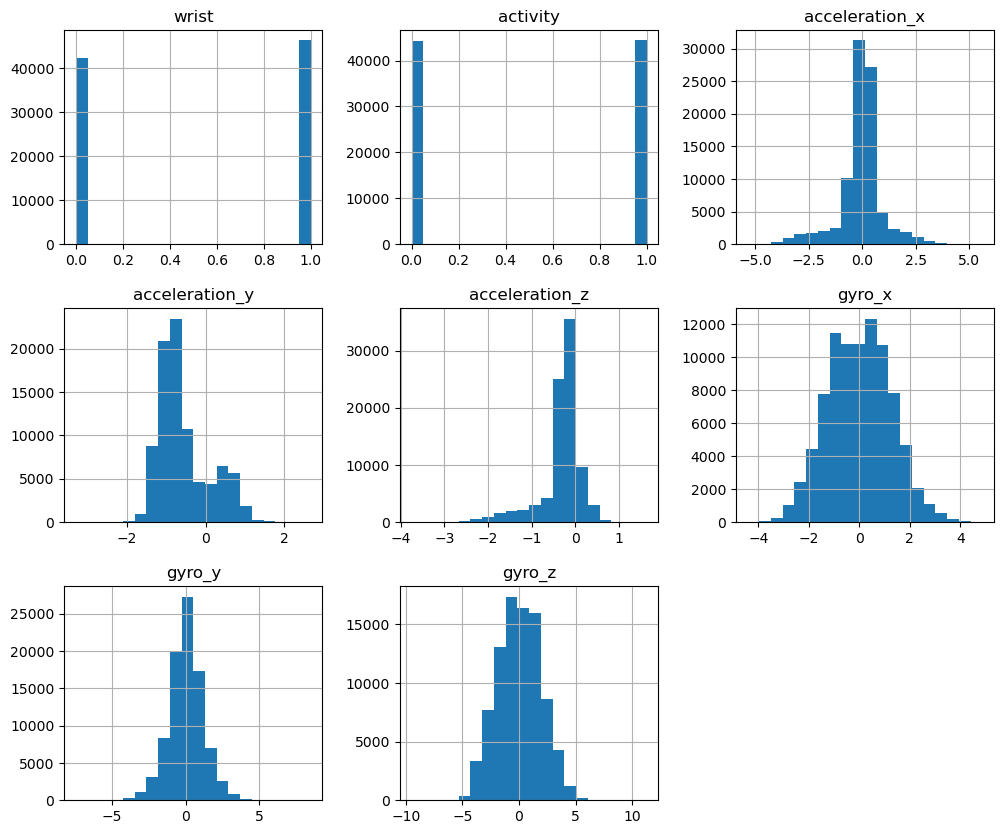

In [16]:
print("\nHistograms of Numerical Features:")
df.hist(figsize=(12, 10), bins=20)
plt.show()

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


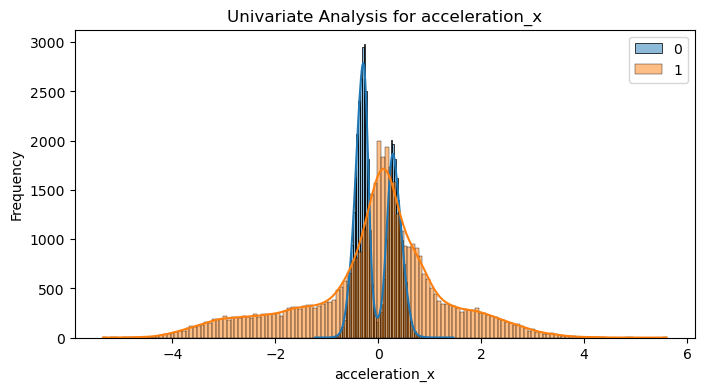

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


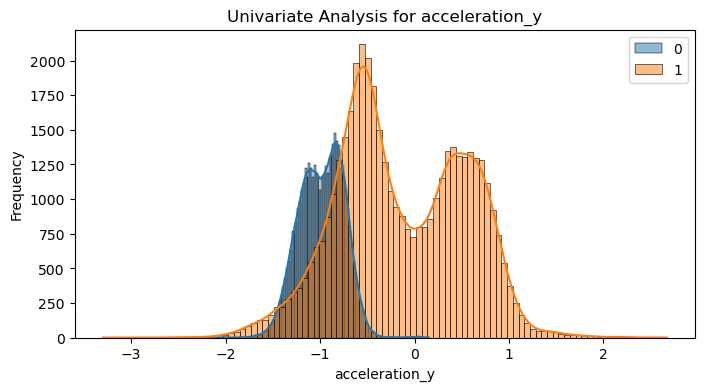

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


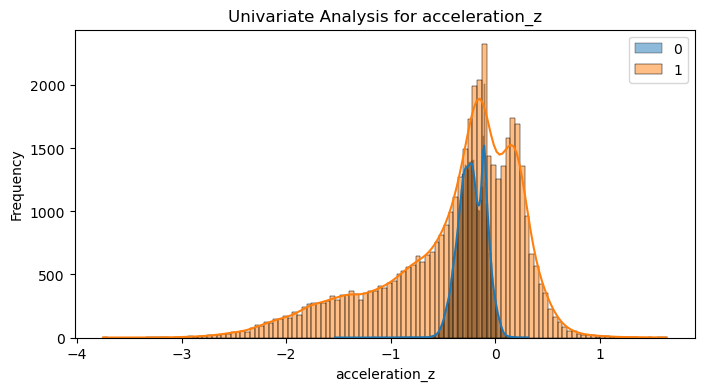

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


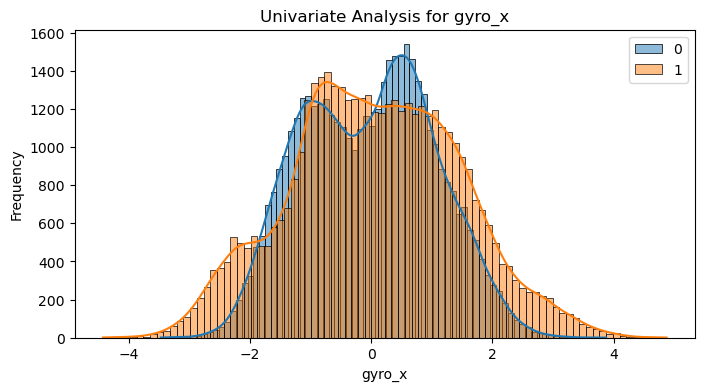

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


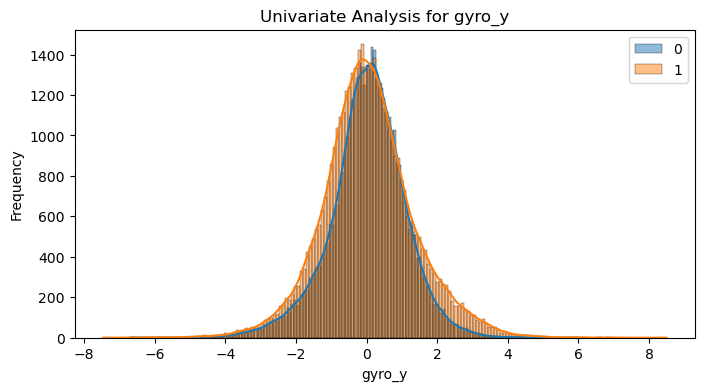

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


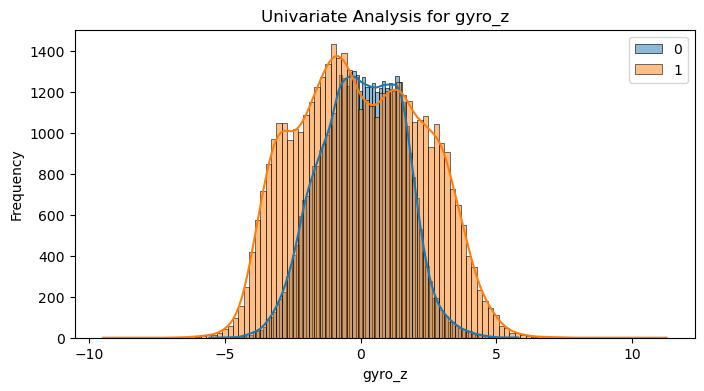

In [17]:
# univarient analysis
for feature in numerical_data:
    plt.figure(figsize=(8, 4))
    
    # Create a separate plot for each class (activity)
    for activity in df['activity'].unique():
        subset = df[df['activity'] == activity]
        sns.histplot(subset[feature], kde=True, label=activity)
    
    plt.title(f'Univariate Analysis for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()

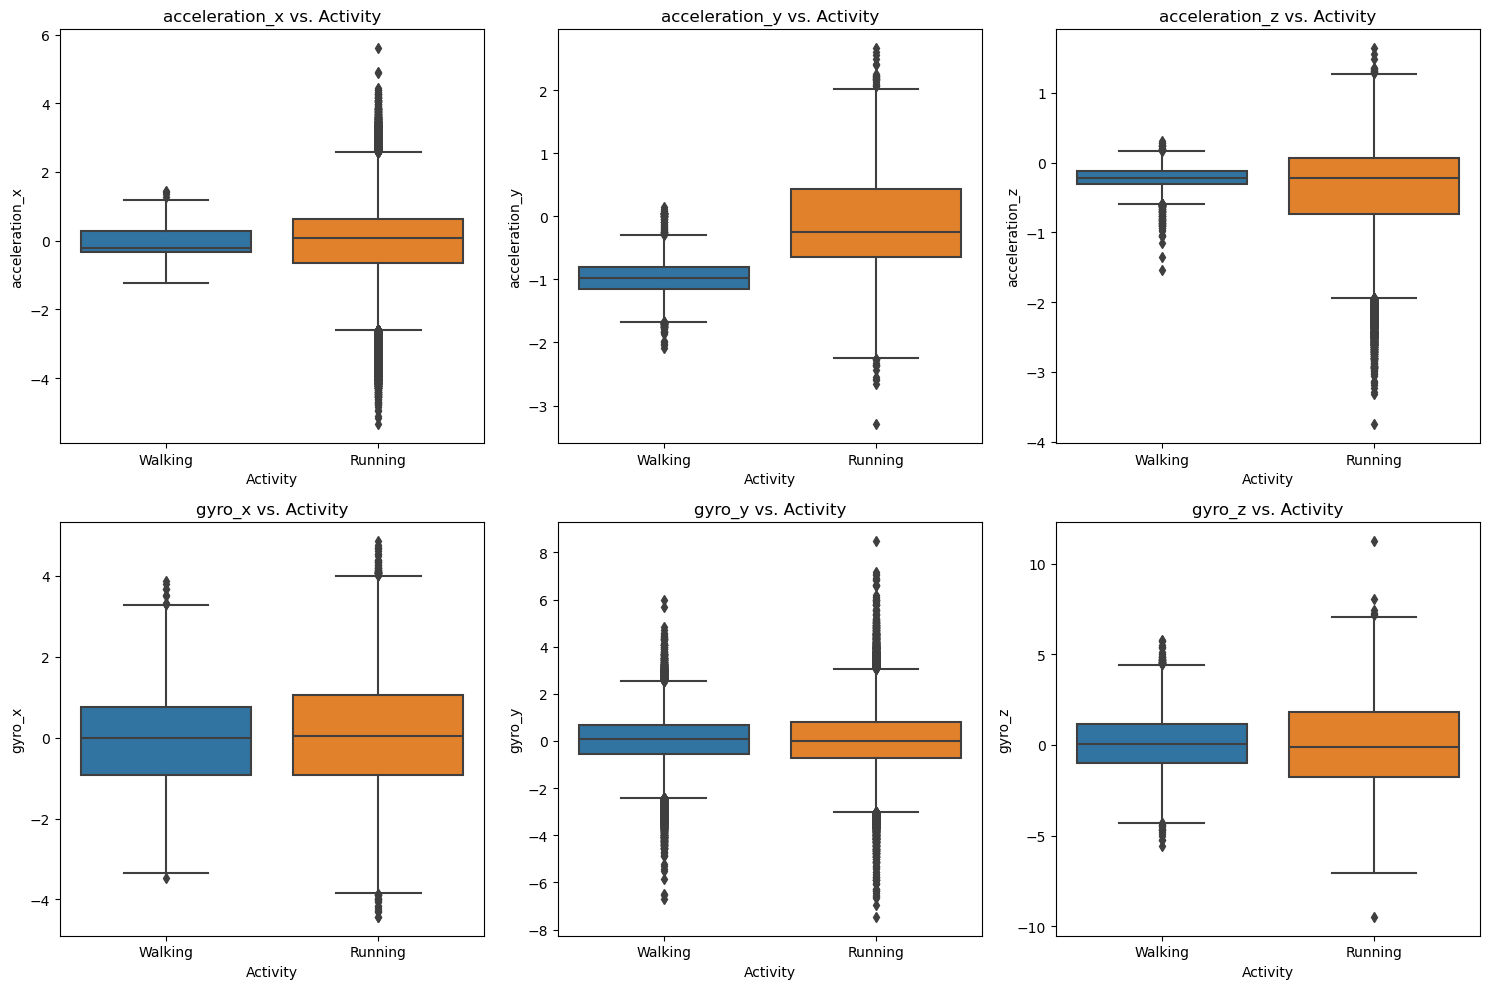

In [18]:
# Bivarient
plt.figure(figsize=(15, 10))
num_features = len(numerical_data.columns)
num_rows = (num_features + 2) // 3
for i, feature in enumerate(numerical_data.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df, x='activity', y=feature)
    plt.title(f"{feature} vs. Activity")
    plt.xlabel("Activity")
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Walking', 'Running'])
plt.tight_layout()
plt.show()


Scatter Plot Matrix:


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

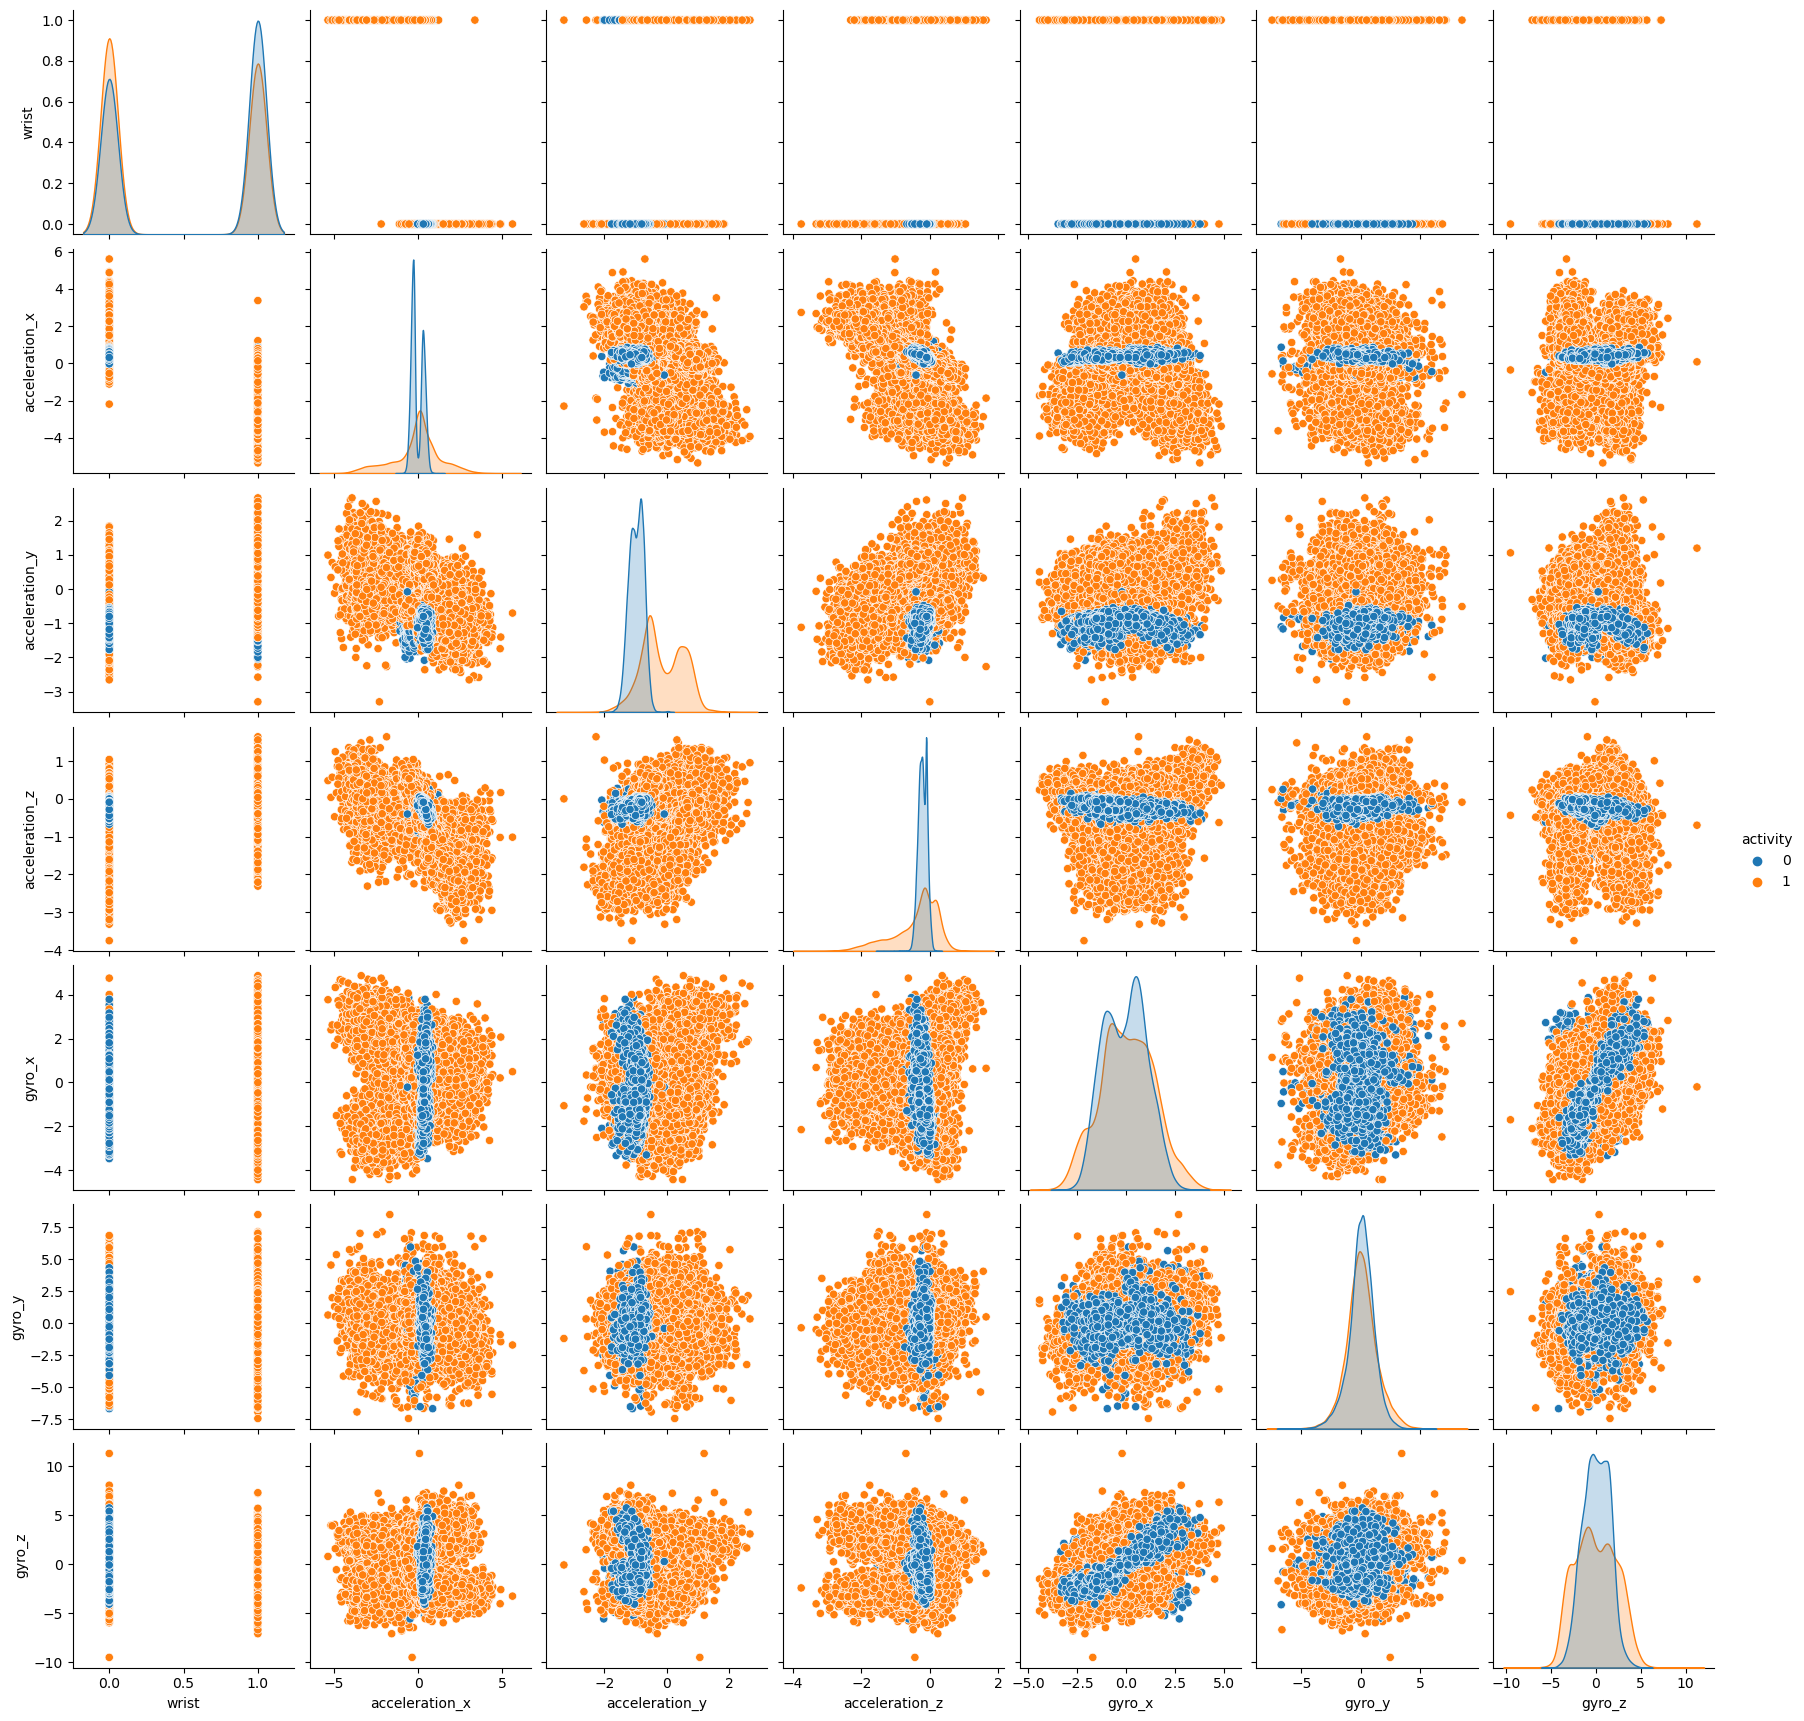

In [19]:
# Scatter Plot Matrix
print("\nScatter Plot Matrix:")
sns.pairplot(data=df, hue='activity', diag_kind='kde')
plt.show()

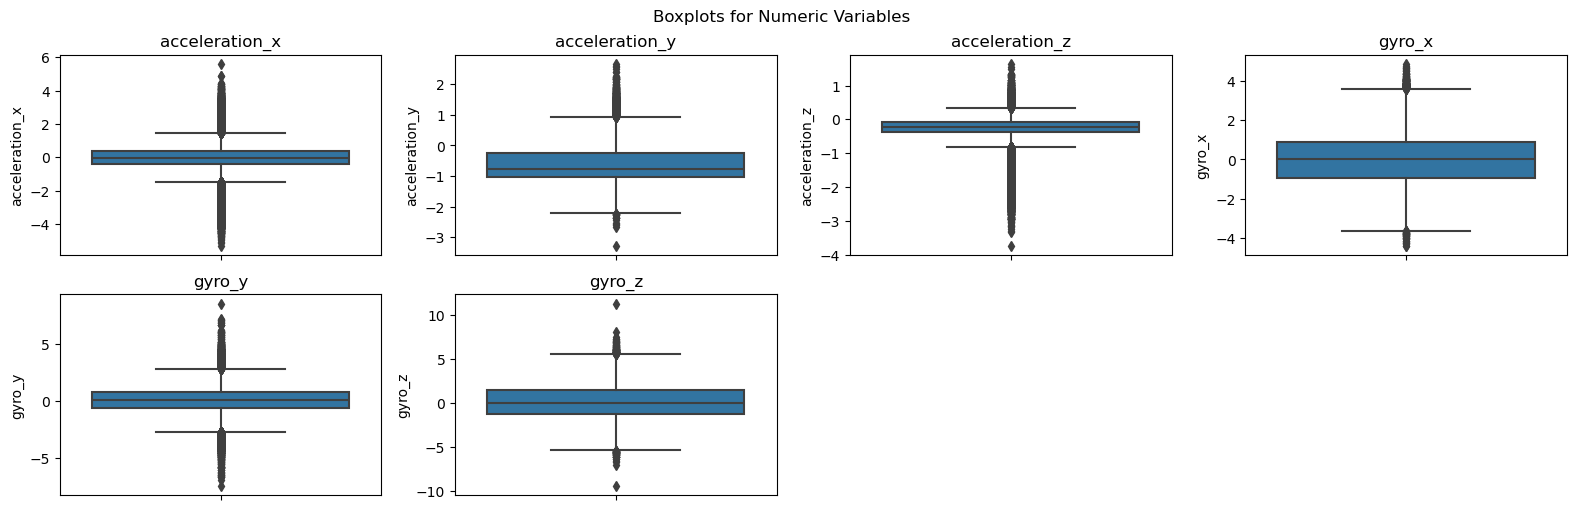

In [20]:
# Checking for Outliers
plt.figure(figsize=(16, 10))
plt.suptitle("Boxplots for Numeric Variables")
for i, column in enumerate(numerical_data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [21]:
# CREATING DATE-TIME

data_date_reformat = df["date"].str.split("-", expand=True) #reformating date time column


data_time_reformat = df["time"].str.split(":", expand=True)

#to join we used concat function 
data_date_time_reformat = pd.concat([data_date_reformat, data_time_reformat], axis=1)
data_date_time_reformat.columns = ["year","month", "day", "hour", "minute", "second", "ns"] #rename columns
data_date_time_obj = pd.to_datetime(data_date_time_reformat)#creating an object
#add datetime object to a new dataframe and set it as index
data_sorted = df.copy()
data_sorted["datetime"] = data_date_time_obj
data_sorted.set_index("datetime", inplace=True)
data_sorted.drop(axis=1, columns=["username"], inplace=True) # droping username column
data_sorted

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
2017-07-09 20:09:15.317911028,2017-7-9,20:9:15:317911028,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
2017-07-09 20:09:15.517889022,2017-7-9,20:9:15:517889022,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
2017-07-09 20:09:15.717828989,2017-7-9,20:9:15:717828989,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616


In [22]:
print("*** last row timestamp before sorting ***")
print(data_sorted.index[-1])
#sort df_sorted data by "datetime" index
data_sorted.sort_index(inplace=True)
print("*** last row timestamp after sorting ***")
print(data_sorted.index[-1])

*** last row timestamp before sorting ***
2017-07-09 20:09:16.117410004
*** last row timestamp after sorting ***
2017-07-17 20:16:03.684989988


##### DATE- TIME FEATURE COLUMN ANALYSIS

C:\Users\shasw\AppData\Local\Temp\ipykernel_4624\1010817102.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
C:\Users\shasw\AppData\Local\Temp\ipykernel_4624\1010817102.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


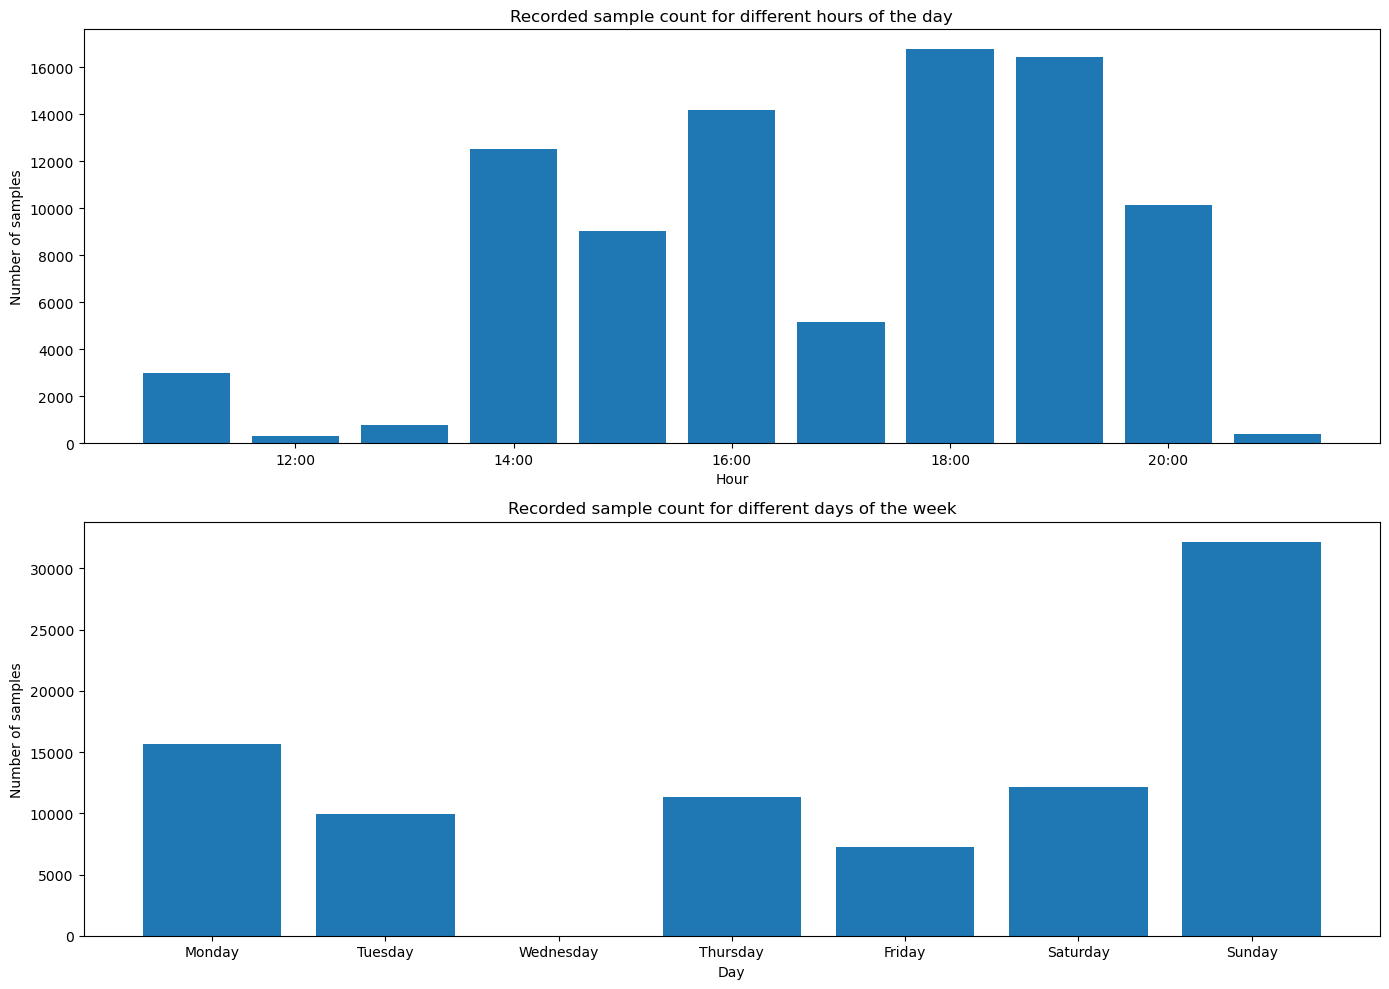

In [23]:
from matplotlib.ticker import FormatStrFormatter
#visualization of user activity pattern
f, ax =  plt.subplots(ncols=1, nrows=2, figsize = (14,10))

#sample count vs hour of day
arr_hr = np.unique(data_sorted.index.hour, return_counts = True)
ax[0].bar(arr_hr[0], arr_hr[1])
ax[0].set_title("Recorded sample count for different hours of the day")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d:00'))

#sample count vs day of week
arr_day = np.unique(data_sorted.index.dayofweek, return_counts = True)
ax[1].bar(arr_day[0], arr_day[1])
ax[1].set_title("Recorded sample count for different days of the week")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

f.tight_layout()
f.show()

##### WRIST AND ACTIVITY ANALYSIS



In [24]:
# Temporary dataframe with "wrist" and "activity" column values replaced
data_sorted_viz = data_sorted.copy()
data_sorted_viz["wrist"] = data_sorted_viz["wrist"].replace({0: "left", 1: "right"})
data_sorted_viz["activity"] = data_sorted_viz["activity"].replace({0: "walk", 1: "run"})

# Sanity check to see if values were updated correctly
print("Updated unique values")
for each_col in ["wrist", "activity"]:
    print(each_col, ":", data_sorted_viz[each_col].unique())

data_sorted_viz.head(1)


Updated unique values
wrist : ['left' 'right']
activity : ['walk' 'run']


,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,left,walk,0.265,-0.7814,-0.0076,-0.059,0.0325,-2.9296


##### visualizing counts of "activity" and "wrist" features

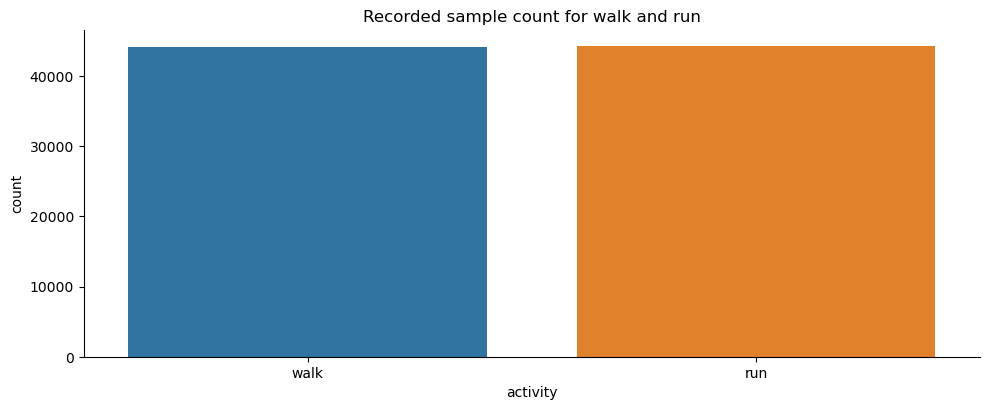

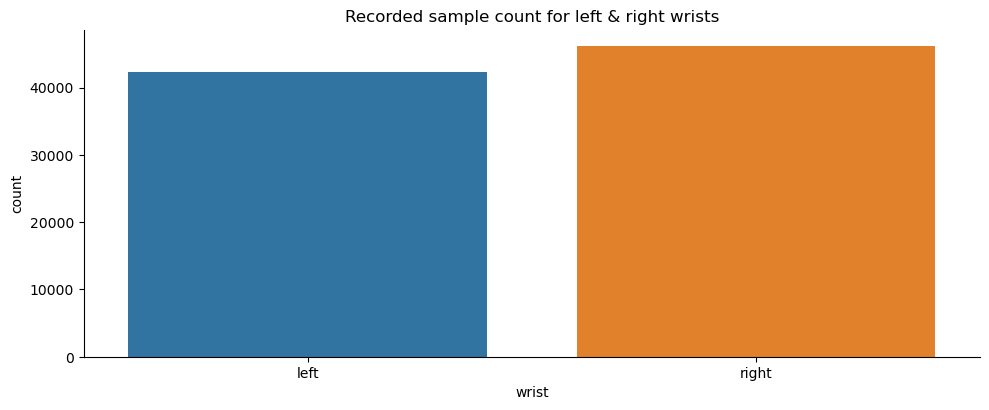

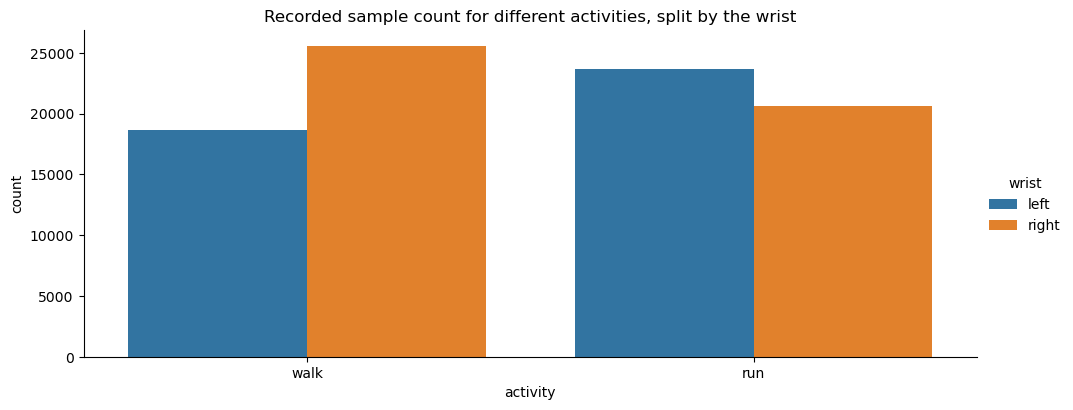

In [25]:

plt_ht = 4
plt_asp = 2.5
#first plot
g_act = sns.catplot(x = "activity", kind = "count", height = plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_act.ax.set_title("Recorded sample count for walk and run")
#second plot
g_wrist = sns.catplot(x = "wrist", kind = "count", height =plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_wrist.ax.set_title("Recorded sample count for left & right wrists")
#third plot
g_act_wri = sns.catplot(x = "activity", kind="count", hue = "wrist", height = plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_act_wri.ax.set_title("Recorded sample count for different activities, split by the wrist")
plt.show()

##### DISTRIBUTION PLOTS OF ACCELEROMETER AND GYROSCOPE DATA



e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

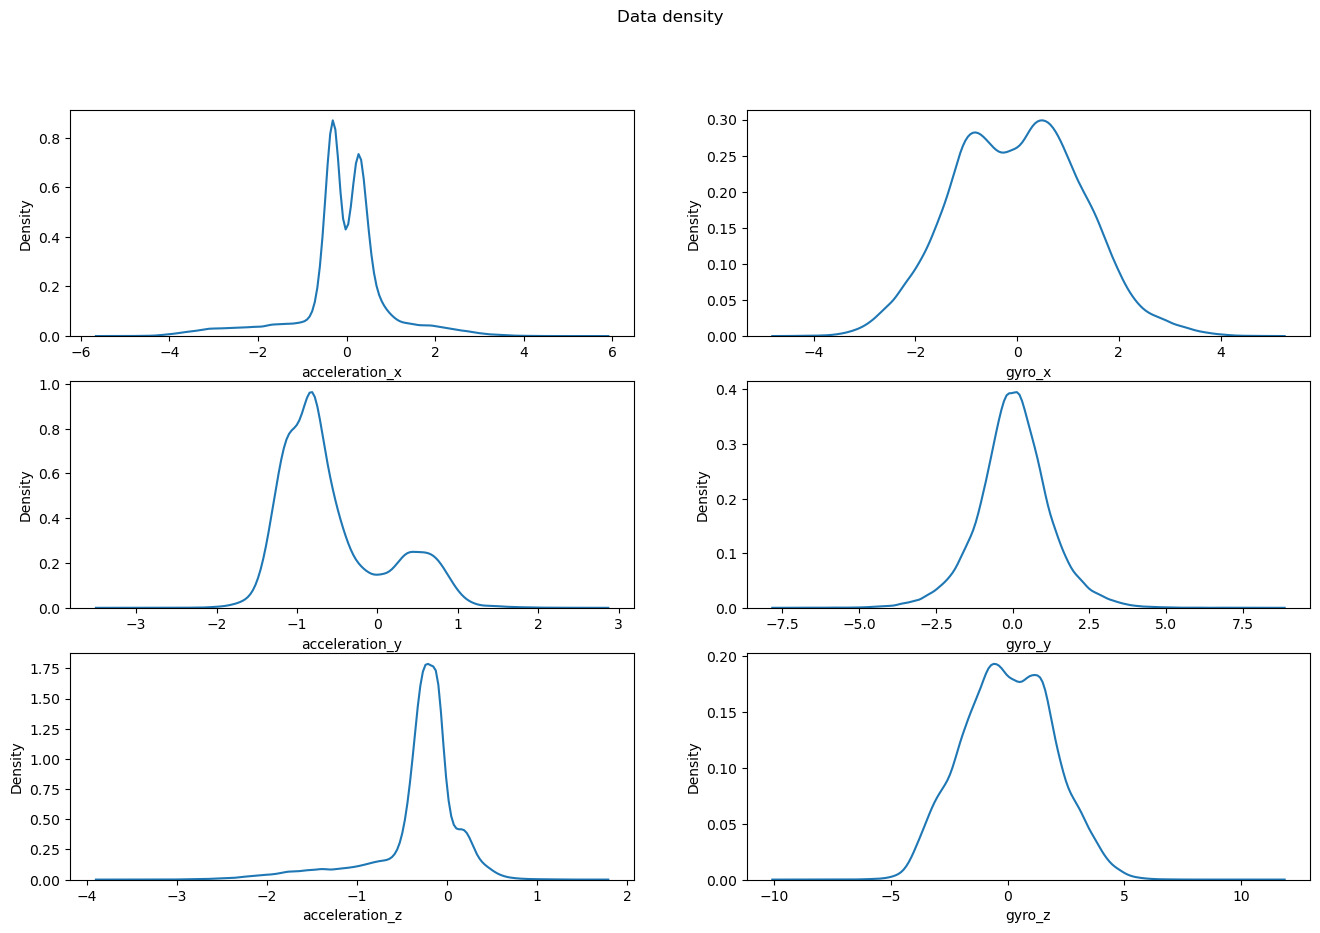

In [26]:
fig_kde, ax_kde = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
ax_num = 0
for each_col in df.columns.values[5:11]:
    g_kde = sns.kdeplot(data_sorted_viz[each_col], ax=ax_kde[ax_num % 3][ax_num // 3])
    ax_num += 1
fig_kde.suptitle("Data density")
#fig_kde.tight_layout()
fig_kde.show()

##### VISUALIZING ACTIVITY SPLIT ACCELEROMETER AND GYROSCOPE DATA

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inst

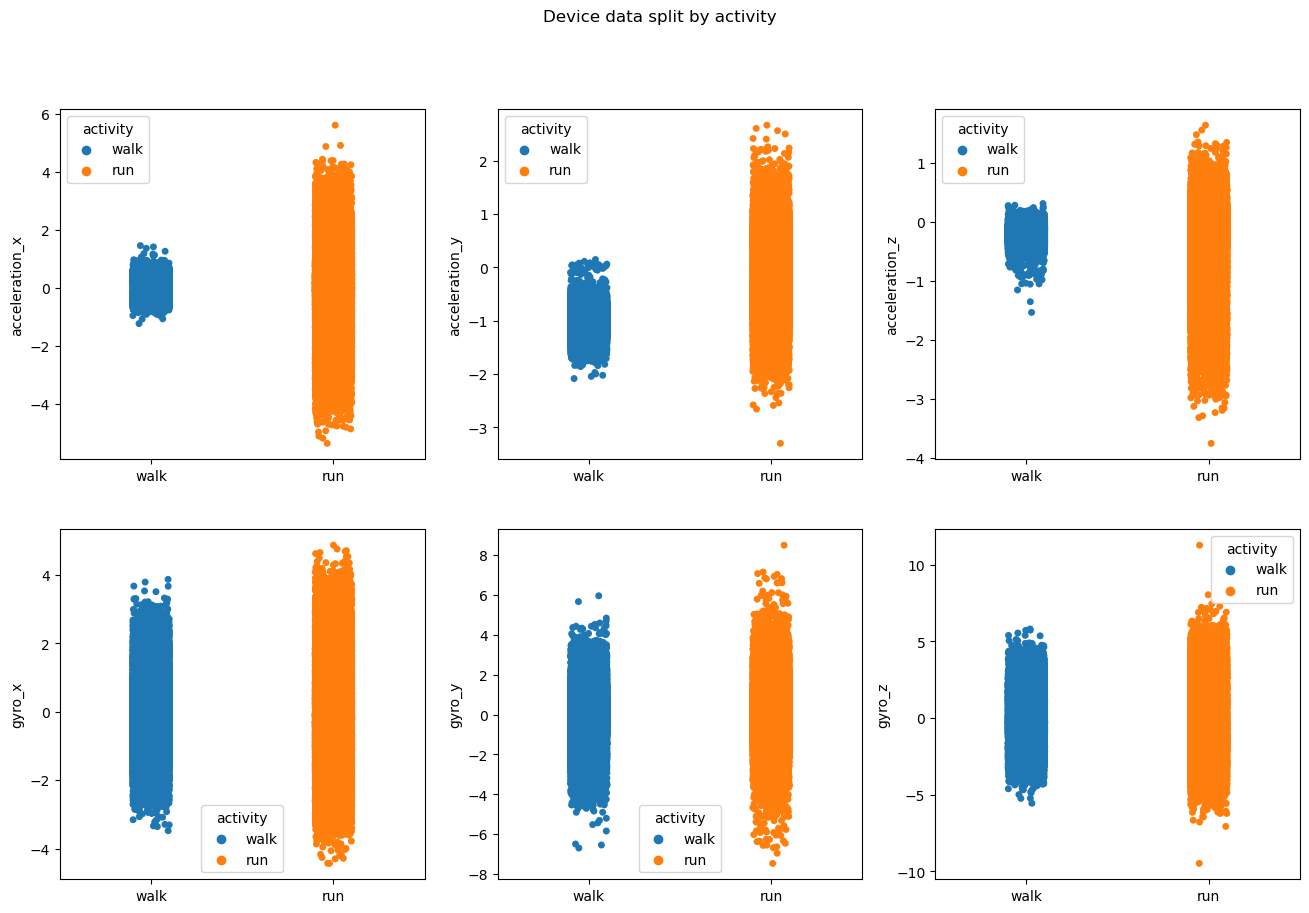

In [27]:

fig_str, ax_str = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig_str.suptitle("Device data split by activity")    
ax_num = 0
for each_col in df.columns.values[5:11]:
    g_str = sns.stripplot(x = "activity", y = each_col, hue = "activity", ax=ax_str[ax_num // 3][ax_num % 3], data = data_sorted_viz)
    ax_num += 1
    g_str.set_xlabel("")
#fig_str.tight_layout()
fig_str.show()

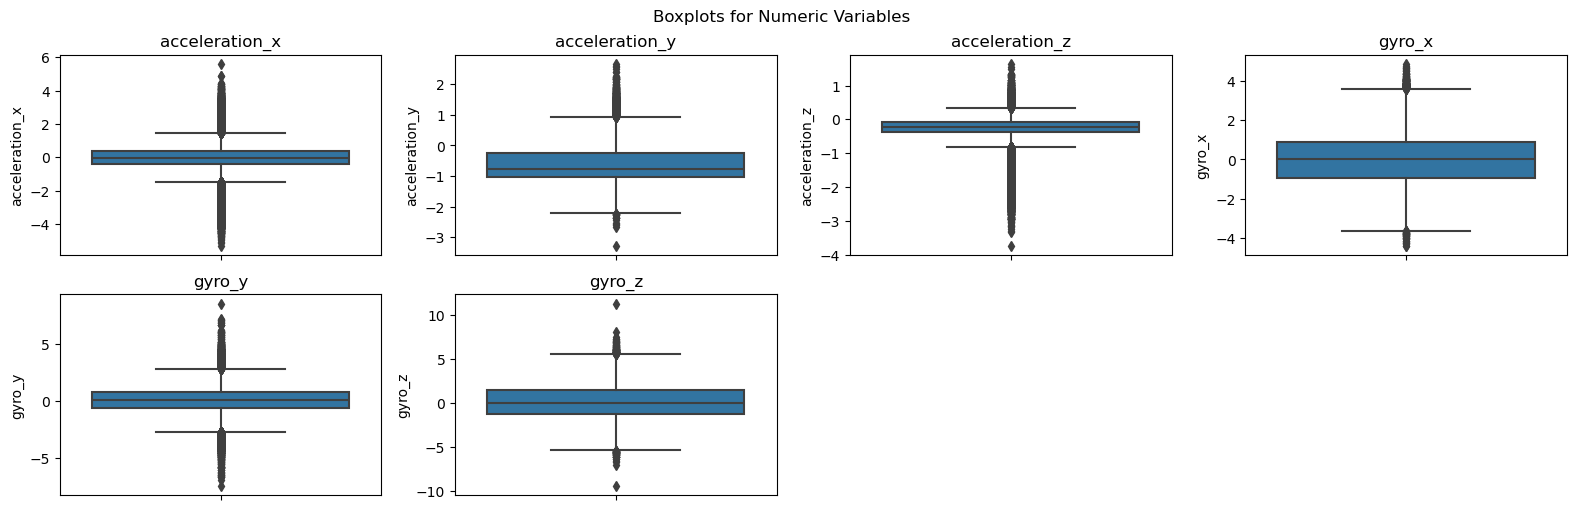

In [28]:
# Create subplots
plt.figure(figsize=(16, 10))
plt.suptitle("Boxplots for Numeric Variables")

for i, column in enumerate(numerical_data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

##### Checking Skewness

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

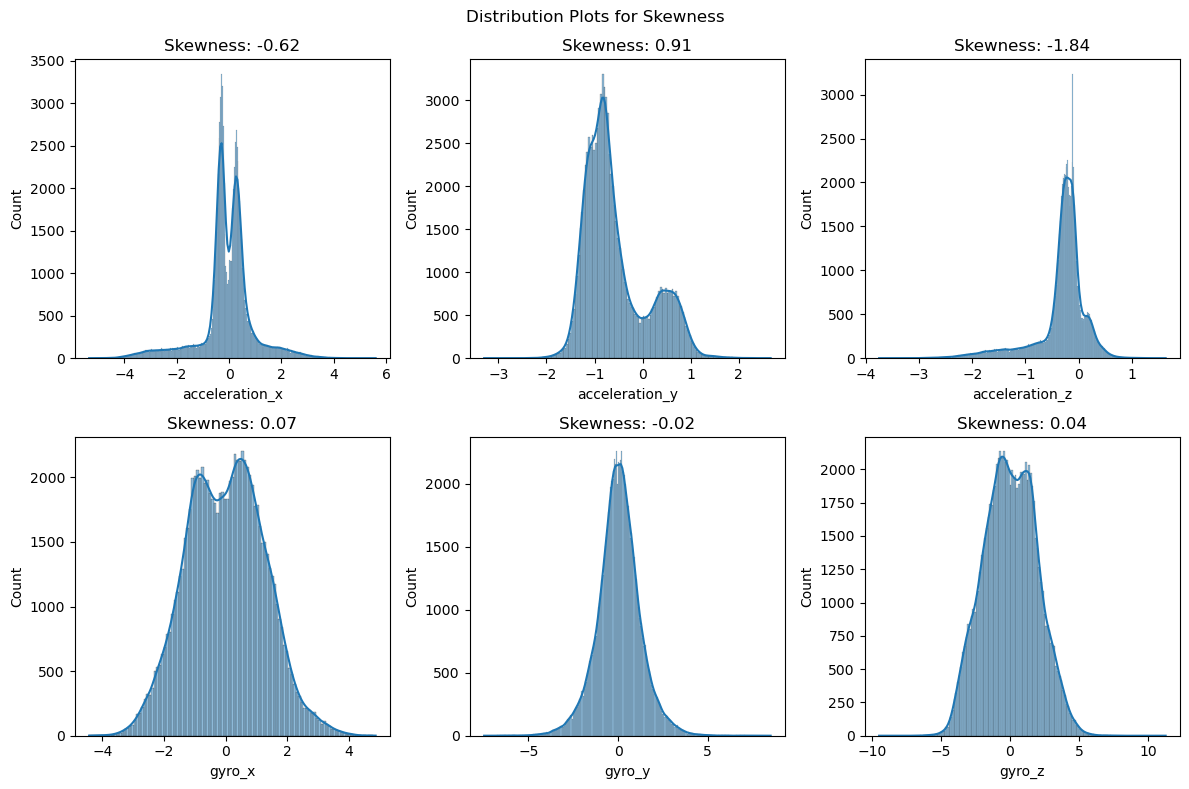

In [29]:

# Before Checking Skewness
num_plots = len(numerical_data.columns)
num_rows = (num_plots + 2) // 3
plt.figure(figsize=(12, 4 * num_rows))
plt.suptitle("Distribution Plots for Skewness")
for i, column in enumerate(numerical_data.columns[:6]):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Skewness: {df[column].skew():.2f}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [30]:
# Calculate skewness before transformation
from scipy import stats
skewness_before = numerical_data.apply(lambda x: stats.skew(x.dropna()))

In [31]:
# Apply transformation to reduce skewness
df_transformed = df.copy()
for feature in numeric_columns:
    skewness = skewness_before[feature]
    if abs(skewness) > 0.5:
        df_transformed[feature] = np.log1p(df[feature])  # Apply log transformation
    else:
        df_transformed[feature] = df[feature]  # No transformation needed

# Calculate skewness after transformation
skewness_after = df_transformed[numeric_columns].apply(lambda x: stats.skew(x.dropna()))


e:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

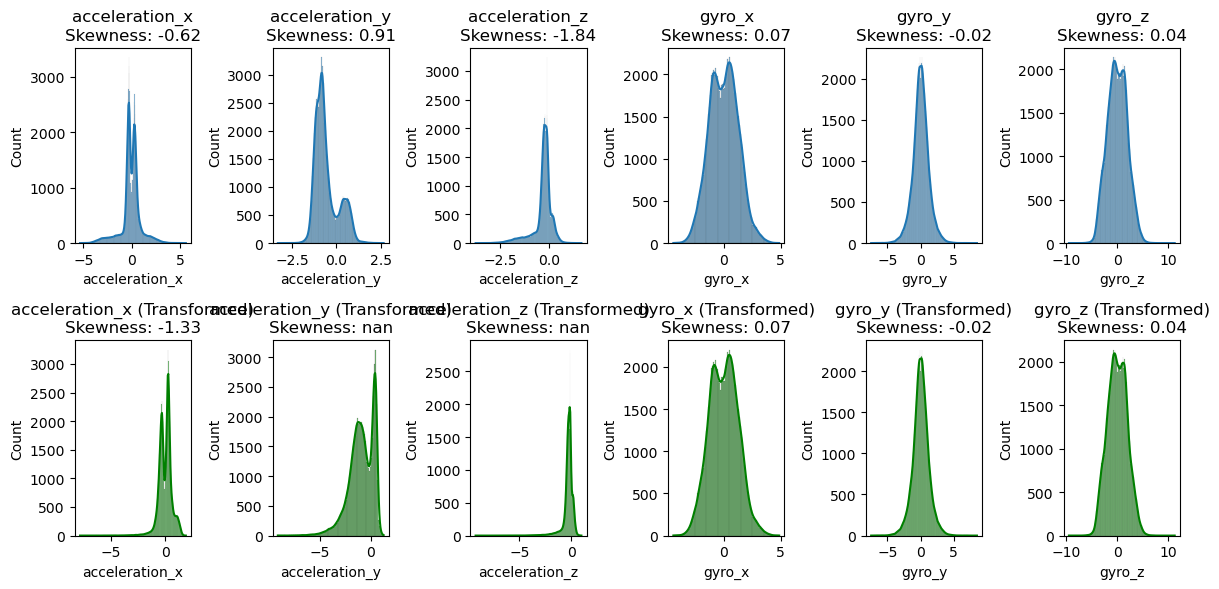

In [32]:

# Plot before and after skewness transformation
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature}\nSkewness: {skewness_before[feature]:.2f}')
    plt.xlabel(feature)

    plt.subplot(2, len(numeric_columns), len(numeric_columns) + i + 1)
    sns.histplot(df_transformed[feature], kde=True, color='green')
    plt.title(f'{feature} (Transformed)\nSkewness: {skewness_after[feature]:.2f}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [33]:
df= df.drop(["date", "time", "username"], axis=1)
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


##### SPLITTING DATA

In [34]:
X = df.iloc[:, [0, 2, 3, 4, 5, 6, 7]]
X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [35]:
y = df.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

#####  Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [37]:
X

array([[-1.04536822,  0.33668266, -0.33231618, ..., -0.05039065,
        -0.00392358, -1.5419494 ],
       [-1.04536822,  0.74013342, -0.85156246, ..., -0.14349622,
        -0.013684  ,  0.05462392],
       [-1.04536822,  0.50997229, -1.39586742, ..., -0.72973418,
         0.05764218, -1.28448139],
       ...,
       [-1.04536822,  0.52859919, -0.93463579, ..., -1.16015794,
        -0.26395131, -0.67066385],
       [-1.04536822,  0.3307379 , -0.44895295, ..., -1.21321296,
         0.34937044, -0.93910129],
       [-1.04536822,  0.3852315 , -0.36177911, ...,  0.09106279,
         0.87409756,  0.65768097]])

##### CHECKING CORRELATION

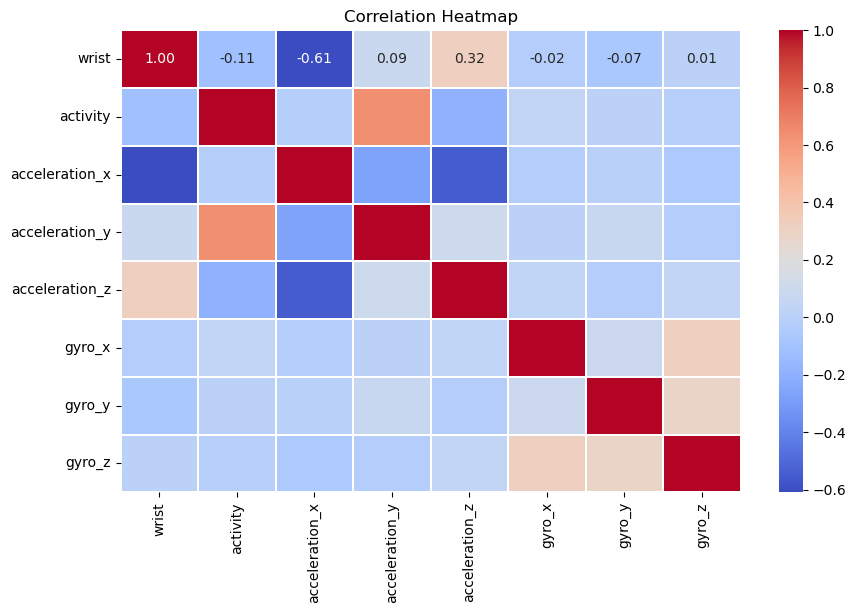

In [38]:

# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3)
plt.title("Correlation Heatmap")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df.drop('activity', axis=1)  # Features
y = df['activity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (70870, 7)
Testing data shape: (17718, 7)


##### Different Model Creation

##### Logistic

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred = logistic_reg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
logistic_reg_acc = accuracy_score(y_test,y_pred)
print(logistic_reg_acc )

[[8116  797]
 [1625 7180]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      8913
           1       0.90      0.82      0.86      8805

    accuracy                           0.86     17718
   macro avg       0.87      0.86      0.86     17718
weighted avg       0.87      0.86      0.86     17718

0.8633028558528051


##### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf.fit(X_train, y_train)
RandomForestClassifier(random_state=42)
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9923
Confusion Matrix:
 [[8837   76]
 [  61 8744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



##### SVM

In [42]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create an SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
 # Fit the model to the training data
svm.fit(X_train, y_train)
SVC(kernel='linear', random_state=42)
# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {svm_accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8670
Confusion Matrix:
 [[8362  551]
 [1805 7000]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      8913
           1       0.93      0.80      0.86      8805

    accuracy                           0.87     17718
   macro avg       0.87      0.87      0.87     17718
weighted avg       0.87      0.87      0.87     17718



##### XG BOOST ALGORITHM

In [43]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create an XGBoost model
xgboost = xgb.XGBClassifier(objective='multi:softmax', num_classes=len(y.unique()), random_state=42)
# Create an XGBoost model with the correct num_class parameter
num_classes = len(y.unique())  # Get the number of unique classes in your target variable
xgboost = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)
# Fit the model to the training data
xgboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgboost.predict(X_test)

# Evaluate the model
xgboost_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {xgboost_accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9929
Confusion Matrix:
 [[8858   55]
 [  71 8734]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [44]:
# Drop non-relevant columns
X = df_transformed.drop(columns=['activity', 'date', 'time', 'username'])
y = df_transformed['activity']


In [45]:
X = X.select_dtypes(include=[np.number])

In [46]:
# Check for infinity or NaN values in the dataset
infinite_mask = np.isinf(X) | np.isnan(X)

# Replace infinite values with NaN, then handle NaN by replacing with maximum value
X[infinite_mask] = np.nan  # Convert inf to NaN to handle them uniformly
X = np.nan_to_num(X, nan=np.nanmax(X)) 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [50]:
# Reshape input data to be 3D [samples, timesteps, features] as required by RNNs
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


##### RNN

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the RNN model

rnn_model = Sequential([
        layers.SimpleRNN(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
   

history = rnn_model.fit(X_train_reshaped, y_train_encoded, batch_size=128, epochs=15, validation_data=(X_test_reshaped, y_test_encoded))


e:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8163 - loss: 0.3949 - val_accuracy: 0.9804 - val_loss: 0.0685
Epoch 2/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0665 - val_accuracy: 0.9857 - val_loss: 0.0476
Epoch 3/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9844 - loss: 0.0500 - val_accuracy: 0.9877 - val_loss: 0.0407
Epoch 4/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9855 - loss: 0.0449 - val_accuracy: 0.9882 - val_loss: 0.0386
Epoch 5/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9900 - val_loss: 0.0363
Epoch 6/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 7/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9889 - loss: 0.0342 - val_accuracy: 0.9915 - val_loss: 0.0301
Epoch 8/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.

In [79]:
# Final training accuracy
final_train_acc = history.history['accuracy'][-1]
print(f"Final training accuracy: {final_train_acc:.4f}")

# Final validation accuracy
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {final_val_acc:.4f}")



Final training accuracy: 0.9909
Final validation accuracy: 0.9914


Plot of RNN model

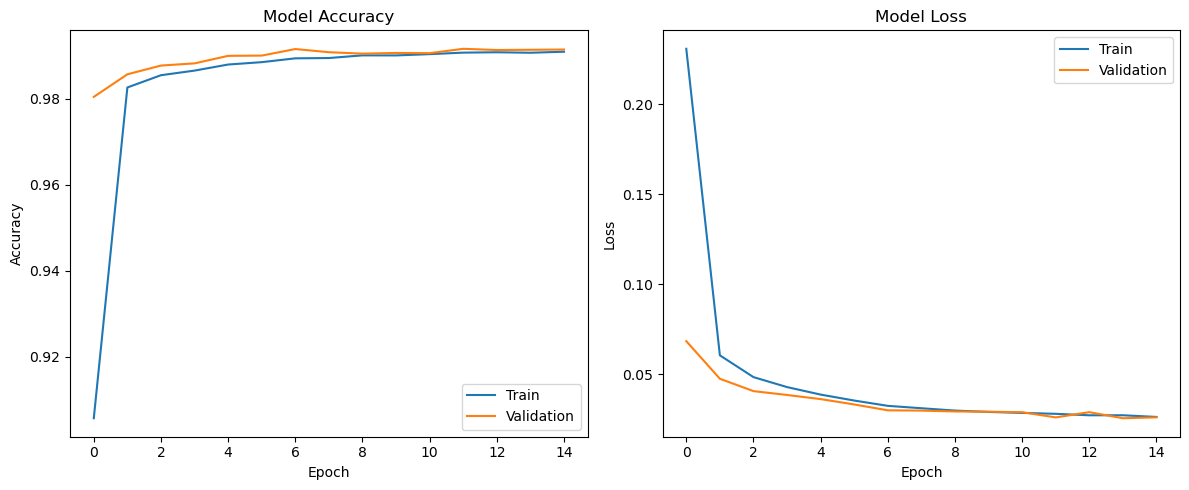

In [80]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


##### Compare between Model

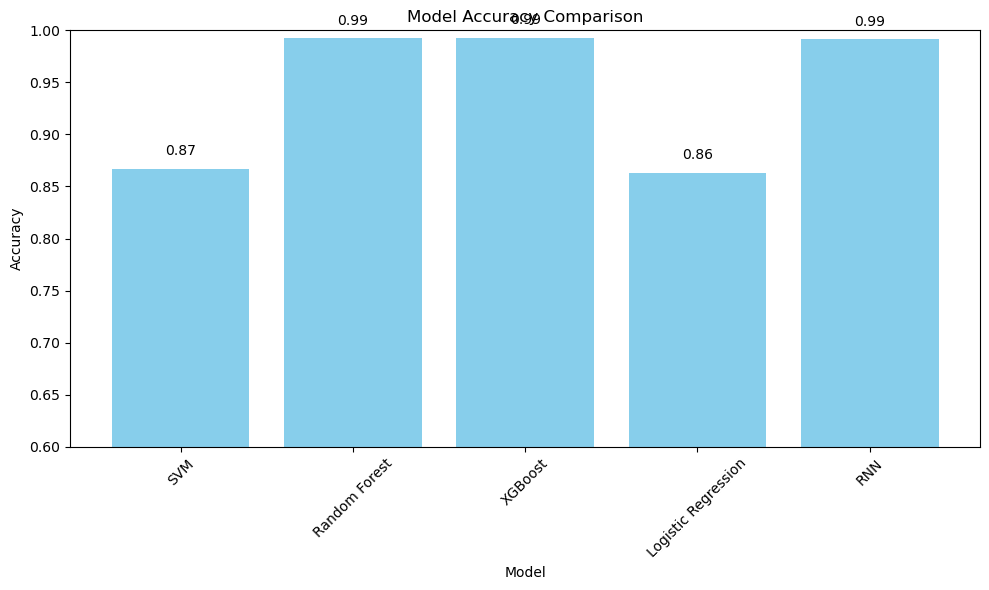

In [90]:

# Collect metrics for each model
model_metrics = {
    'SVM': {'accuracy': svm_accuracy},
    'Random Forest': {'accuracy': rf_accuracy},
    'XGBoost': {'accuracy': xgboost_accuracy},
    'Logistic Regression': {'accuracy': logistic_reg_acc},
    'RNN': {'accuracy': history.history['val_accuracy'][-1]},  # Last epoch accuracy
}

# Extract model names and accuracy values
models = list(model_metrics.keys())
accuracies = [model_metrics[model]['accuracy'] for model in models]

# Bar plot for accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')

# Add text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)  # Assuming accuracy is in the range [0, 1]
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Best Model

In [87]:
# Define model metrics with accuracy
model_metrics = {
    'SVM': {'accuracy': svm_accuracy},
    'Random Forest': {'accuracy': rf_accuracy},
    'XGBoost': {'accuracy': xgboost_accuracy},
    'Logistic Regression': {'accuracy': logistic_reg_acc},
    'RNN': {'accuracy': history.history['val_accuracy'][-1]},  # Last epoch accuracy
}

# Find the best model based on accuracy
best_model = max(model_metrics, key=lambda model: model_metrics[model]['accuracy'])
best_accuracy = model_metrics[best_model]['accuracy']

# Print the best model and its accuracy
print(f'The best model is {best_model} with an accuracy of {best_accuracy:.4f}')


The best model is XGBoost with an accuracy of 0.9929


##### Conclusion
The WalkRun classification project successfully developed and evaluated machine learning models to distinguish between walking and running activities based on motion sensor data. Through comprehensive data analysis and the application of various models, I identified XGboost as the most accurate and reliable for this task, achieving an accuracy of .9929.

Overall, this project lays the groundwork for developing intelligent systems capable of real-time activity classification, contributing to advancements in wearable technology and personalized health care solutions.